# kneed -- knee detection in Python

For the purposes of the walkthrough, import `DataGenerator` to create simulated datasets.  
In practice, the `KneeLocator` class will be used to identify the knee point.

In [34]:
%matplotlib inline

from kneed.data_generator import DataGenerator
from kneed.knee_locator import KneeLocator

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [35]:
np.random.seed(23) # only for the walkthrough

In [36]:
DG = DataGenerator()
x,y = DG.noisy_gaussian(N=1000)

In [37]:
x[:5],y[:5]

(array([24.14475503, 24.92443938, 24.93769683, 25.37559952, 25.45830214]),
 array([0.   , 0.001, 0.002, 0.003, 0.004]))

The knee is located by passing `x` and `y` values to `knee_locator`.  
`S` is the sensitivity parameter  
`curve`='concave'

In [38]:
kneedle = KneeLocator(x, y, S=15.0, curve='concave', direction='increasing')

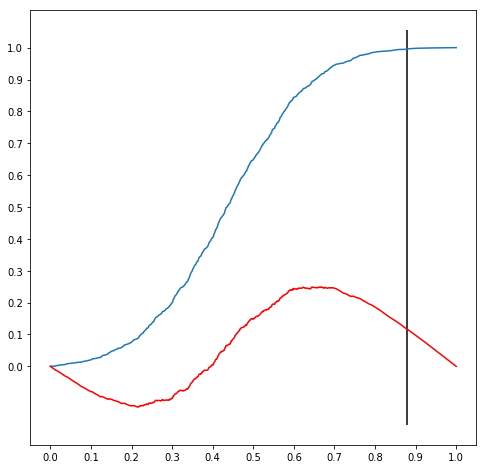

In [39]:
kneedle.plot_knee_normalized()

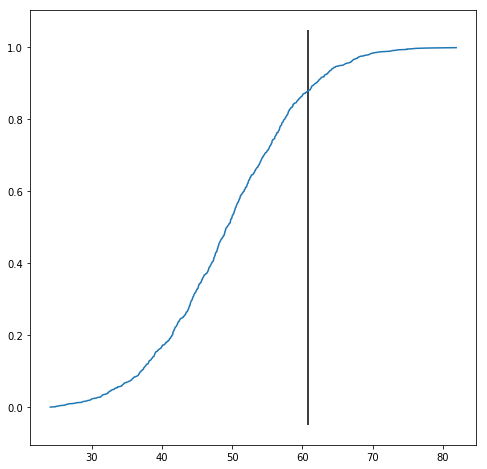

In [40]:
kneedle.plot_knee()

In [41]:
kneedle.knee

60.763851270368505

There are plotting functions to visualize the knee point on the raw data and the normalized data.

## Average Knee for NoisyGaussian from 50 random iterations

In [19]:
knees = []
for i in range(50):
    x,y = DG.noisy_gaussian(N=1000)
    kneedle = KneeLocator(x, y, direction='increasing', curve='convex')
    knees.append(kneedle.knee)

In [20]:
np.mean(knees)

60.349290078688824

# Test all type of functions

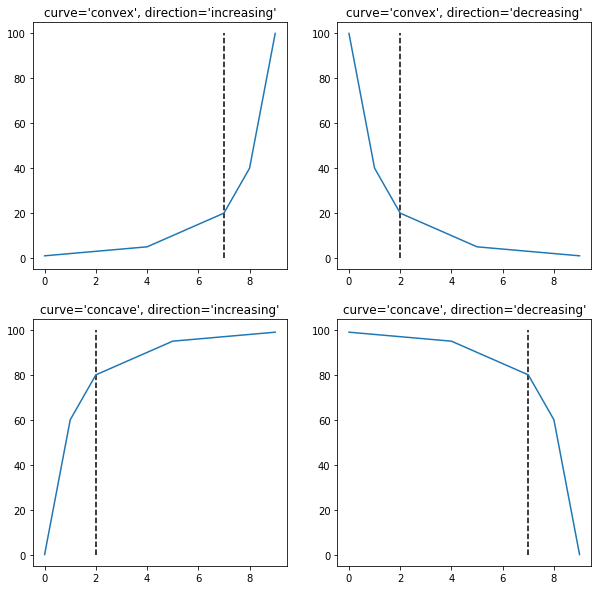

In [43]:
x = np.arange(0,10)
y_convex_inc = np.array([1,2,3,4,5,10,15,20,40,100])
y_convex_dec = y_convex_inc[::-1]
y_concave_dec = 100 - y_convex_inc
y_concave_inc = 100 - y_convex_dec

kn = KneeLocator(x, y_convex_inc, curve='convex')
knee_yconvinc = kn.knee

kn = KneeLocator(x, y_convex_dec, curve='convex', direction='decreasing')
knee_yconvdec = kn.knee

kn = KneeLocator(x, y_concave_inc, curve='concave')
knee_yconcinc = kn.knee

kn = KneeLocator(x, y_concave_dec, curve='concave', direction='decreasing')
knee_yconcdec = kn.knee

f, axes = plt.subplots(2, 2, figsize=(10,10));
yconvinc = axes[0][0]
yconvdec = axes[0][1]
yconcinc = axes[1][0]
yconcdec = axes[1][1]

sns.lineplot(x, y_convex_inc, ax=axes[0][0])
yconvinc.vlines(x=knee_yconvinc, ymin=0, ymax=100, linestyle='--')
yconvinc.set_title("curve='convex', direction='increasing'")

sns.lineplot(x, y_convex_dec, ax=axes[0][1])
yconvdec.vlines(x=knee_yconvdec, ymin=0, ymax=100, linestyle='--')
yconvdec.set_title("curve='convex', direction='decreasing'")

sns.lineplot(x, y_concave_inc, ax=axes[1][0])
yconcinc.vlines(x=knee_yconcinc, ymin=0, ymax=100, linestyle='--')
yconcinc.set_title("curve='concave', direction='increasing'")

sns.lineplot(x, y_concave_dec, ax=axes[1][1])
yconcdec.vlines(x=knee_yconcdec, ymin=0, ymax=100, linestyle='--')
yconcdec.set_title("curve='concave', direction='decreasing'");